# Fractal Generation using Tensorflow

# Manderblot set

## Creating Manderblot set using tensorflow.

The Mandelbrot set is the set of complex numbers c for which the function does not diverge when iterated from z = 0  i.e., for which the sequence remains bounded in absolute value. 

$ f_c(z) =  z^2 + c $

Formally,

$ z_{n+1} =  z_{n}^2 + c $


https://en.wikipedia.org/wiki/Mandelbrot_set


In [1]:
# Calling the dependencies

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [2]:

# Creating function to propogate the fractal values to next steps


def processFractal(a):
    """Display an array of iteration counts as a colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),30+50*np.sin(a_cyclic),155-80*np.cos(a_cyclic)],2)
    img[a==a.max()]=0
    a=img
    a=np.uint8(np.clip(a,0,255))
    return a


In [3]:

# Creating a descent values for meshgrid

Y, X =  np.mgrid[-1.3:1.3:0.001, -2:1:0.001]

# Creating a complex number using the meshgrid
Z = X+1j*Y

In [4]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs,tf.float32))


In [5]:
# Mandelbrot Set
for i in range(255):
	#Compute the new values of z: z^2 + x
	zs_ = zs*zs + xs 
	# Have we diverged with this new value?
	not_diverged = tf.abs(zs_) < 4
	# Update variables to compute
	ns.assign_add(tf.cast(not_diverged, tf.float32))
	zs.assign(zs_)

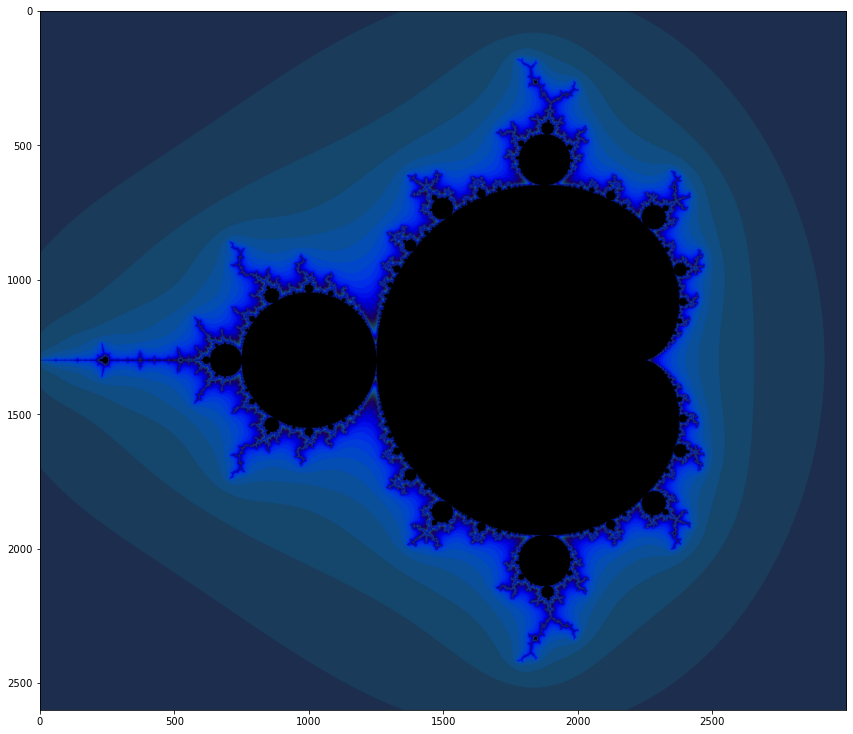

In [6]:
# Plotting the fractal on 2-D complex Plane
fig=plt.figure(figsize=(16,10))

plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

### getting a higher resolution image for mandelbrot set

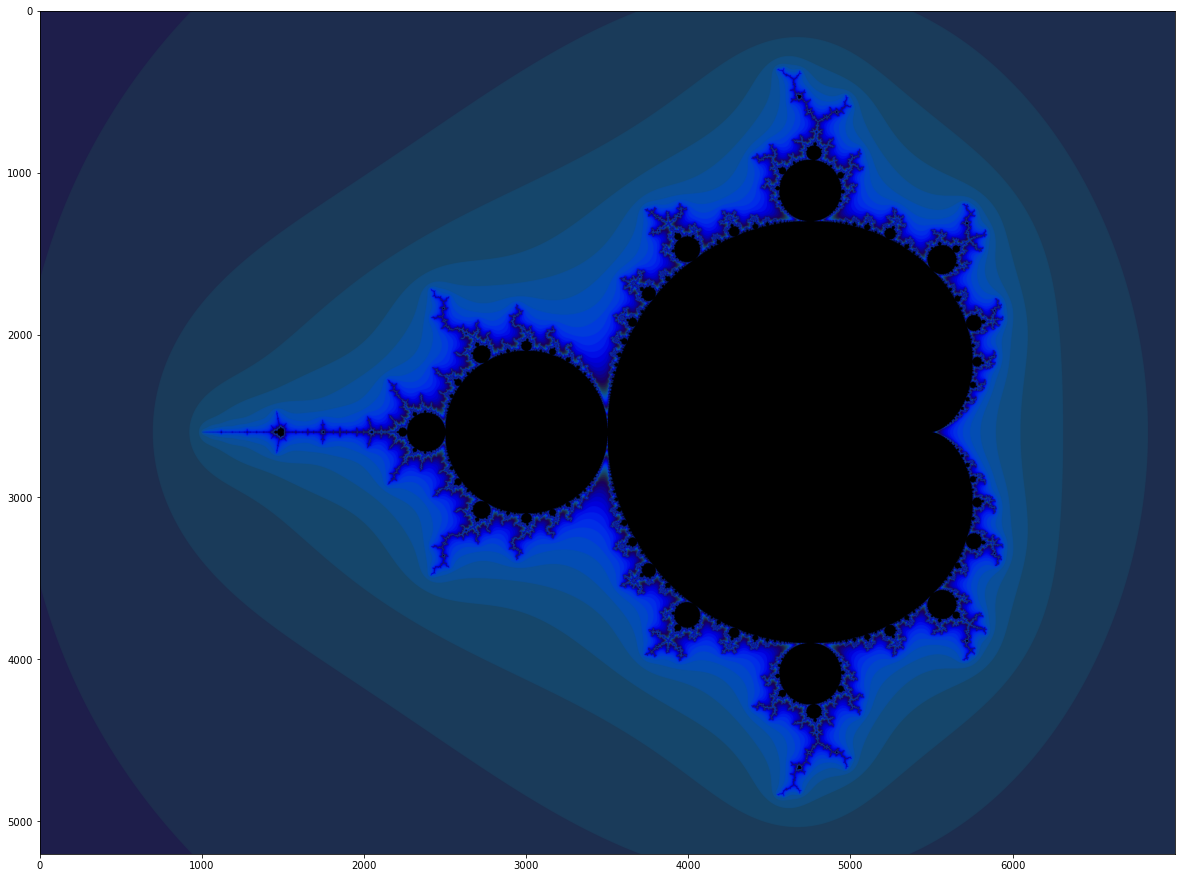

In [7]:
#getting a higher resolution image for mandelbrot set

Y, X =  np.mgrid[-1.3:1.3:0.0005, -2.5:1:0.0005]
Z = X+1j*Y


xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs,tf.float32))


# Mandelbrot Set
for i in range(255):
	#Compute the new values of z: z^2 + x
	zs_ = zs*zs + xs 
	# Have we diverged with this new value?
	not_diverged = tf.abs(zs_) < 4
	# Update variables to compute
	ns.assign_add(tf.cast(not_diverged, tf.float32))
	zs.assign(zs_)
#


# Plotting the fractal on 2-D complex Plane
fig=plt.figure(figsize=(18,12))

plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()
    



## Zooming to a particular section of Mandelbrot set (point bridge)
### Creating a for loop to zoom from 0.5 X to 8 X and trying to focus on first point bridge (-0.75, 0j)

### To create the zoom, I have scaled up the mesh grid in such a way that it centers to a fixed point with every loop.
### To calculate the fixed point, the formula is 
### (y,x) = (1/scaling_factor) *Y - (scaling_factor/(scaling_factor+scaling_factor))   ,(1/scaling_factor)*X - (scaling_factor/(scaling_factor+scaling_factor))


In [9]:
# To create the zoom, I have scaled up the mesh grid in such a way that it centers to a fixed point with every loop.
#To calculate the fixed point, the formula is 
#(y,x) = (1/scaling_factor) *Y - (scaling_factor/(scaling_factor+scaling_factor))   ,(1/scaling_factor)*X - (scaling_factor/(scaling_factor+scaling_factor))

for zoom in np.arange(1,2000,10):
    Y, X =  np.mgrid[-1.3:1.3:0.005, -2.75:1.75:0.005]
    Y, X = (1/zoom) *Y - 0.11  ,(1/zoom)*X - 0.77
    Z = X+1j*Y
    xs = tf.constant(Z.astype(np.complex64))
    zs = tf.Variable(xs)
    ns = tf.Variable(tf.zeros_like(xs,tf.float32))
    clear_output(wait=True)
    for i in range( max(zoom,250) ):
        #Compute the new values of z: z^2 + x
        zs_ = zs*zs + xs 
        # Have we diverged with this new value?
        not_diverged = tf.abs(zs_) < 4
        # Update variables to compute
        ns.assign_add(tf.cast(not_diverged, tf.float32))
        zs.assign(zs_)
    fig=plt.figure(figsize=(16,12))

    plt.imshow(processFractal(ns.numpy()))
    plt.tight_layout(pad=0)
    plt.show()
    
    
    
    
    

# Julia Sets

### For this Demo, I have created Julia sets for  

$ z^2 + 0.7885 e^{ia}, a [0 to 2 \pi] $

### More information on: https://en.wikipedia.org/wiki/Julia_set

In [10]:
import math as m

pi = m.pi

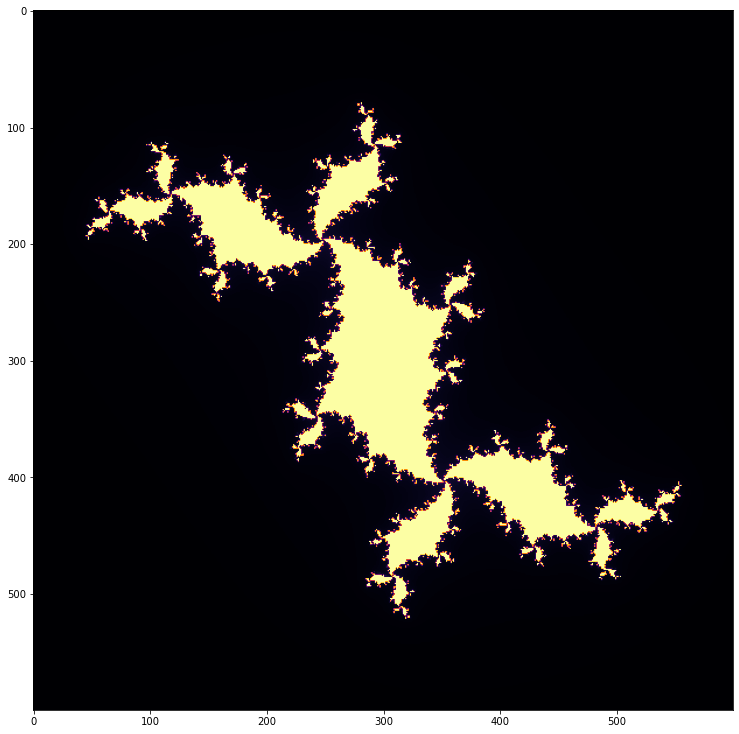

In [13]:

for k in np.arange(-1.5,1.5,0.01):
    
    Y, X = np.mgrid[-1.5:1.5:0.005, -1.5:1.5:0.005]
    
    Z = X+1j*Y  
    
    
    
    xs = tf.constant(Z.astype(np.complex64))
    zs = tf.Variable(xs)
    ns = tf.Variable(tf.zeros_like(xs,tf.float32))

    clear_output(wait=True)
    for i in range(300):
        #Compute the new values of z: z^2 + c
        zs_ = zs*zs + 0.7885*(np.cos(pi + k) + 1j*np.sin(pi + k))
        # Have we diverged with this new value?
        not_diverged = tf.abs(zs_) < 4
        # Update variables to compute
        ns.assign_add(tf.cast(not_diverged, tf.float32))
        zs.assign(zs_)
    fig=plt.figure(figsize=(16,10))

    plt.imshow(ns.numpy(), cmap = 'inferno')
    plt.tight_layout(pad=0)
    plt.show()
    
    
    


# Phoenix Fractal

## Phoenix fractal takes into account of feedback of last instance. The formula for a phoenix fractal is :


$z_{n+1} = z_{n}^{2} + Re(c) + Im(c) * z_{n - 1}$

### For this demo, I have taken Re(c) = 0.5667 and changed Im(c) in for loop from range [-0.55, -0.35] to find interesting patterns

### Initial value of $z_{n -1}$ = 0

### next value of $z_{n -1}$ = Im($z_{n}$) + Re($z_{n}$)*i


### More information on: http://usefuljs.net/fractals/docs/mandelvariants.html


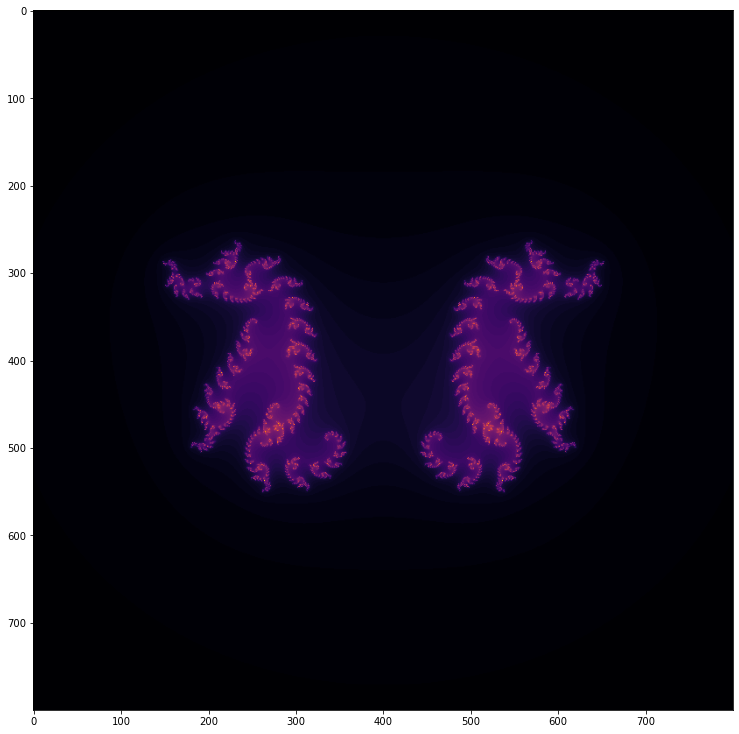

In [19]:
# Single snapshot of Phoenix set


# Initializing the Mesh grid and creating a Complex plane.
Y, X = np.mgrid[-2:2:0.005, -2:2:0.005]
Z = X+1j*Y  

# Rotating the Complex values to get a wing-like structure
Z = Z * (np.cos(np.pi/2) - 1j*np.sin(np.pi/2))

# Declaring the variables
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs,tf.float32))

# initializing value of z_(n-1)

z0=0


clear_output(wait=True)
for i in range(300):
    #Compute the new values of z based on the formula
    
    zs_ =  zs*zs   + 0.5617 + -0.447*1j * z0 
    
    z0 =  -1 * 1j *zs

    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4
    # Update variables to compute
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    zs.assign(zs_)
fig=plt.figure(figsize=(16,10))

plt.imshow((ns.numpy()), cmap = 'inferno')
plt.tight_layout(pad=0)
#plt.close()
plt.show()


## To create various patterns, I have taken various range of C. I have fixed the real part of c and changed the variable part in range [-0.55, -.35]. 

### With every loop, it changes the constant value making different patterns in the fractal.


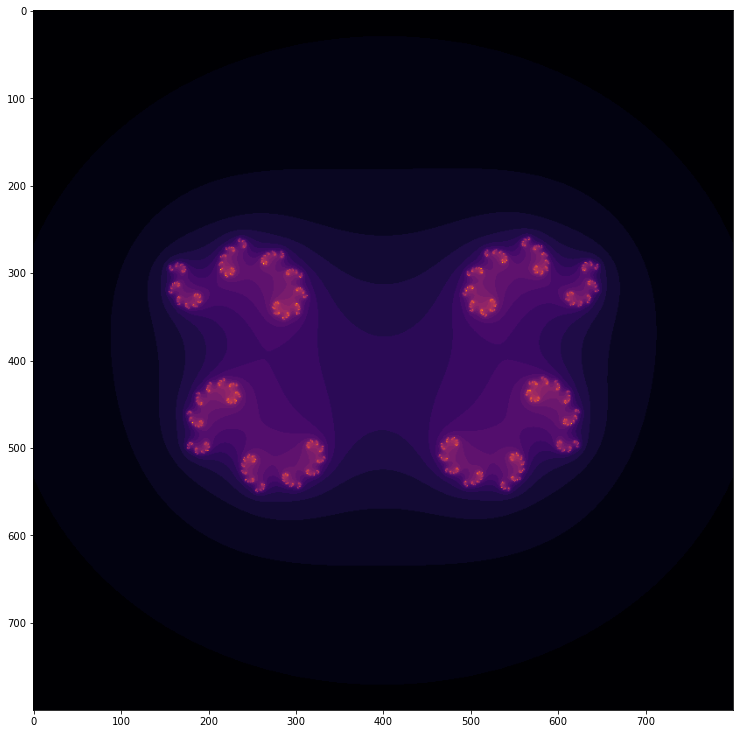

In [22]:
# Looped Snapshots of phoenix set


for k in np.arange(-.525,-.3,0.001):
    
    # Initializing the Mesh grid and creating a Complex plane.

    Y, X = np.mgrid[-2:2:0.005, -2:2:0.005]
    Z = X+1j*Y  
    
    Z = Z * (np.cos(np.pi/2) - 1j*np.sin(np.pi/2))
    
    # Declaring the variables
    xs = tf.constant(Z.astype(np.complex64))
    zs = tf.Variable(xs)
    ns = tf.Variable(tf.zeros_like(xs,tf.float32))
    
    ## initializing value of z_(n-1)
    
    z0=.04
    
    clear_output(wait=True)
    for i in range(300):
        ##Compute the new values of z based on the formula
        
        
        zs_ =  zs*zs   + 0.5667 + k*1j * z0 
        
        z0 =  -1 * 1j *zs
    
        # Have we diverged with this new value?
        not_diverged = tf.abs(zs_) < 4
        # Update variables to compute
        ns.assign_add(tf.cast(not_diverged, tf.float32))
        zs.assign(zs_)
    fig=plt.figure(figsize=(16,10))
    
    
    plt.imshow((ns.numpy()), cmap='inferno')
    plt.tight_layout(pad=0)
    #plt.close()
    plt.show()